In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

sns.set(style='whitegrid', palette='muted')

In [2]:
# Load S&P 500 Index Data

df = pd.read_csv('Data/sandf500_1986_2018.csv', parse_dates=['date'])
df.rename(columns={"close": "value"}, inplace=True)
df.head()

,date,value
0,1986-01-02,209.59
1,1986-01-03,210.88
2,1986-01-06,210.65
3,1986-01-07,213.80
4,1986-01-08,207.97


In [3]:
# Data Preprocessing


from Tools.Preprocessor import Preprocessor

data = Preprocessor(df, training_size=0.8)
data.standardise()

In [5]:
# Build and train an LSTM Autoencoder


from Tools.AutoEncoder_LSTM import AutoEncoder_LSTM

auto = AutoEncoder_LSTM()
auto.train_model(data, num_patience=10)

Epoch 1/100
184/184 [==============================] - 5s 27ms/step - loss: 0.1518 - val_loss: 0.2159
Epoch 2/100
184/184 [==============================] - 5s 25ms/step - loss: 0.1126 - val_loss: 0.1071
Epoch 3/100
184/184 [==============================] - 5s 26ms/step - loss: 0.0878 - val_loss: 0.0769
Epoch 4/100
184/184 [==============================] - 5s 25ms/step - loss: 0.0815 - val_loss: 0.0356
Epoch 5/100
184/184 [==============================] - 5s 25ms/step - loss: 0.0761 - val_loss: 0.0527
Epoch 6/100
184/184 [==============================] - 5s 25ms/step - loss: 0.0780 - val_loss: 0.0409
Epoch 7/100
184/184 [==============================] - 5s 25ms/step - loss: 0.0767 - val_loss: 0.0481
Epoch 8/100
184/184 [==============================] - 5s 25ms/step - loss: 0.0759 - val_loss: 0.0485
Epoch 9/100
184/184 [==============================] - 5s 26ms/step - loss: 0.0750 - val_loss: 0.0482
Epoch 10/100
184/184 [==============================] - 5s 26ms/step - loss: 0.075

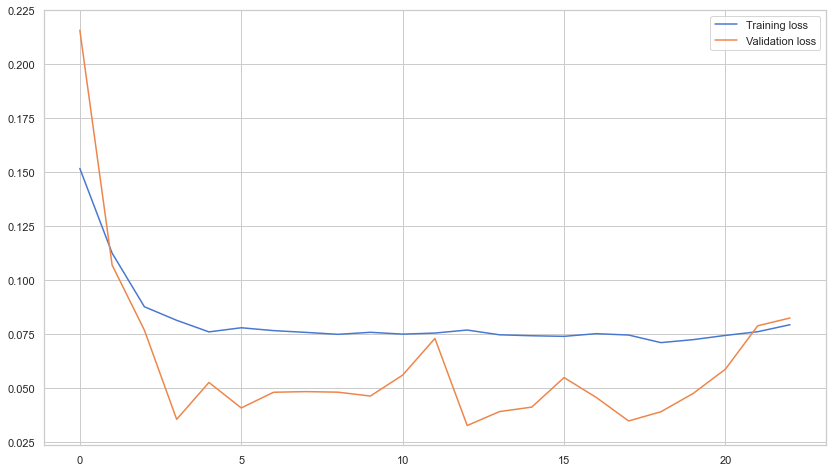

In [6]:
auto.plot_trained_model()